In [70]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\user\Desktop\AIML_Timeseries\week1\testset.csv")
data.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [71]:
#data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
data['datetime']=data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M"))
data=data.set_index('datetime')
#data=data['2001':]

#data.iloc[0,0]
if data['Temperature'].isnull().values.any()==True:
    data[data['Temperature'].isnull()]=data['Temperature'].mean()
data.head()   

,Temperature
datetime,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


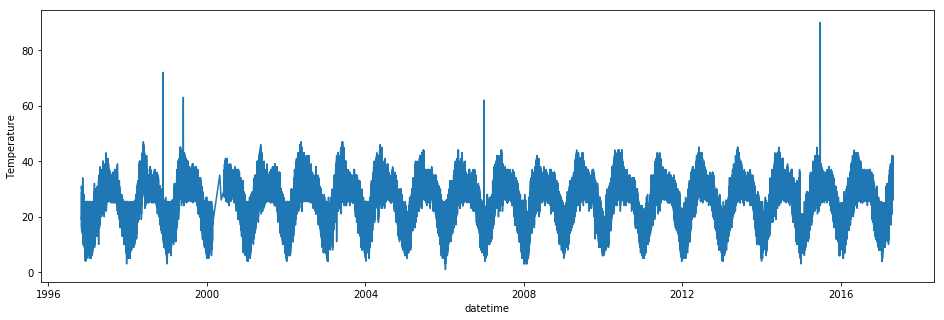

In [72]:
plt.figure(figsize=(16,5))
plt.xlabel('datetime')
plt.ylabel('Temperature')
plt.plot(data)

In [73]:
#series = pd.read_csv(r"C:\Users\srtpa\Downloads\datasets_1057_1913_AirPassengers.csv", header=0, index_col=0,
#parse_dates=True, squeeze=True)
#temps = DataFrame(series.values)
from pandas import concat
#dataframe = concat([temps.shift(1), temps], axis=1)
#dataframe.columns = ['t','t+1']
#print(dataframe.head(5))
temps=pd.DataFrame(data['Temperature'].values)
dataframe = concat([temps.shift(2),temps.shift(1), temps], axis=1)
dataframe.columns = ['t','t+1','t+2']
dataframe.head()

,t,t+1,t+2
0,NaN,NaN,30.0
1,NaN,30.0,28.0
2,30.0,28.0,24.0
3,28.0,24.0,24.0
4,24.0,24.0,23.0


#Since I am facing memory issues when using the whole data, I am resampling the data from the year 2001
----------------------------------------------------------------------------------------------------------------------------

In [76]:
#data['Temperature'].isnull().values.any()


newdata = data['2001':].resample('M').mean()
newdata.head()

,Temperature
datetime,
2001-01-31,12.657776
2001-02-28,18.286759
2001-03-31,23.560144
2001-04-30,29.663181
2001-05-31,32.987991


In [62]:
#WEEK2:QN:Perform the analysis done in this week on the mean temperature dataset. 

from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(window=12).mean()
    movingstd=ts.rolling(window=12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.plot(movingstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Std')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
   # print("type of df_test: ",type(df_test))
  #  print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
   # print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)
    
    

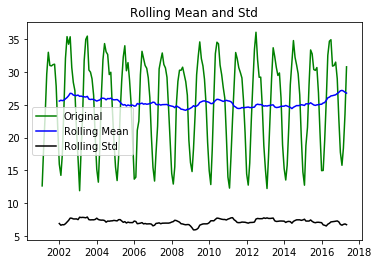

Augmented Dickey-Fuller test:
Test Statistic                  -1.448570
p-value                          0.558783
#Lags Used                      11.000000
Number of Observations Used    184.000000
Critical Value (1%)             -3.466398
Critical Value (5%)             -2.877380
Critical Value (10%)            -2.575214
dtype: float64


In [77]:
#type(newdata['Temperature'])
stationarity_check(newdata['Temperature'])

#Week2:Also, write in detail about the insights you found while doing the analysis.
----------------------------------------------------------------------------------------------------------------------
Here we see that after performing the ADF test the P value is 0.55 (>0.05) and the test statistic value is within the critical value. Thus the ADF test fails to reject the null hypothesis and implies that the distribution is non-stationary.

#Week2 Write about the p-value, test statistic, critical values in detail and how are they important to determine stationarity
-------------------------------------------------- 

Critical value of a hypothesis test depends on the Significance level(alpha, usually chosen as 0.1, 0.05, 0.01 etc).
Critical values define the cut off of the regions where the test statistic is unlikely to lie. The null hypothesis test is rejected if the test statistic exceeds this critical values.
The p-value is the probability of the test statistic being at least as extreme as the one observed given that the null hypothesis is true. A small p-value is an indication that the null hypothesis is false.


#Week2:Write about steps that can be taken to make a time-series stationary
------------------------------------------------------------------------------
In order to make a time series a method called diffing is used. Here we take the difference between the data points and create a new time series. If the time series is still non stationary we can perform the diffing multiple times. But this makes the analysis more complex.

#week2:Understand the ADF test mathematically.
----------------------------------------------------------------------
                        ADF test is used to test the stationarity of the time series.
If we model a time series as below: considering the stochastic (random) part of time series

yt =  c+ фyt-1+et  -----(1) ,where c=constant, et=error .So here the current value depends only on the previous value. 
by subtracting yt-1 from both sides of (1) 

Δy=c+(1-ф) yt-1 +et , when ф=1( unit root ) and the yt-1 does not  provide any information in predicting the change in the yt. 

When we consider only one previous value, we use the Dickey –Fuller test to check if it has uniroot. We can not use T-test, as the null hypothesis assumes series to be stationary. Hence we use the new test. 

This is a one-sided left tail test. Here we can reject the null hypothesis when ф<1. In this case the test statistic will be  negative. If it is less than the critical value (which is also negative) we can reject the null hypothesis and prove that there are no unit roots and hence the time series is stationary.

In the ADF test we consider not just the dependency on the immediate previous value, but also other previous values (including lags of higher order).Here also we are checking for the unit roots. To determine the lags,  significance of each lag has to be checked (could be done by T-tests).
 

